<h1><center>Introductory Data Analysis Workflow</center></h1>


![Pipeline](https://imgs.xkcd.com/comics/data_pipeline.png)

https://xkcd.com/2054

# An example machine learning notebook

*  Original Notebook by [Randal S. Olson](http://www.randalolson.com/)
*  Supported by [Jason H. Moore](http://www.epistasis.org/)
*  [University of Pennsylvania Institute for Bioinformatics](http://upibi.org/)
*  Adapted for Py-Sem 2018-2025 by [Valdis Saulespurens](valdis.s.coding@gmail.com)

If you have not done this yet - You can run this Jupyter Notebook In Google Colab [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/notebooks/day4_Irises_Data_Analysis_Workflow_Classification_Clustering.ipynb?force_copy=true)- no local installation required.

## 📅 Day 4 — Full Data Analysis Pipeline (Classification & Intro to Clustering)

### 📚 Instruction (3h)
- 🌱 **Recap**: From raw dataset → cleaned, explored, ready for modeling  
- 🏗 **Full pipeline introduction**  
  - Train/test split refresher  
  - Feature preparation & scaling  
  - Model selection process  
- 🤖 **Classification models (supervised ML)**  
  - k-Nearest Neighbors (KNN)  
  - Decision Trees  
  - Random Forest  
  - Logistic Regression (intro)  
  - Support Vector Machines (optional, time permitting)  
- 📏 **Model evaluation**  
  - Accuracy, confusion matrix, classification report  
  - Train vs test performance  
  - Importance of cross-validation  
- 🔮 **Clustering preview (unsupervised ML)**  
  - What clustering is, why it differs from classification  
  - Example: k-Means on Iris dataset  
  - Reflection on strengths/limitations  

---

### 🛠 Practical (1h)
- 📂 Load Iris dataset  
- ➗ Perform train/test split  
- 🏃 Train 2–3 classifiers (KNN, Decision Tree, Logistic Regression)  
- 📊 Compare their performance using accuracy & confusion matrix  
- ✨ If time allows: run k-Means clustering and compare with true labels  

---

### 🔄 Reflection (1h)
- 👥 Small-group discussion: Which classifier worked best and why?  
- 📝 Short recap quiz: difference between classification vs clustering  
- 💬 Open Q&A: when would you use clustering in real projects?  


In [1]:
import datetime
print(datetime.datetime.now())
import sys
print(f"Python version {sys.version}")

2025-11-03 16:05:55.346869
Python version 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


## Table of contents

1. [Introduction](#Introduction)

2. [License](#License)

3. [Required libraries](#Required-libraries)

4. [The problem domain](#The-problem-domain)

5. [Step 1: Answering the question](#Step-1:-Answering-the-question)

6. [Step 2: Checking the data](#Step-2:-Checking-the-data)

7. [Step 3: Tidying the data](#Step-3:-Tidying-the-data)

    - [Bonus: Testing our data](#Bonus:-Testing-our-data)

8. [Step 4: Exploratory analysis](#Step-4:-Exploratory-analysis)

9. [Step 5: Classification](#Step-5:-Classification)

    - [Cross-validation](#Cross-validation)

    - [Parameter tuning](#Parameter-tuning)

10. [Step 6: Reproducibility](#Step-6:-Reproducibility)

11. [Conclusions](#Conclusions)

12. [Further reading](#Further-reading)

13. [Acknowledgements](#Acknowledgements)

## Introduction

[[ go back to the top ]](#Table-of-contents)

In the time it took you to read this sentence, terabytes of data have been collectively generated across the world — more data than any of us could ever hope to process, much less make sense of, on the machines we're using to read this notebook.

In response to this massive influx of data, the field of Data Science has come to the forefront in the past decade. Cobbled together by people from a diverse array of fields — statistics, physics, computer science, design, and many more — the field of Data Science represents our collective desire to understand and harness the abundance of data around us to build a better world.

In this notebook, I'm going to go over a basic Python data analysis pipeline from start to finish to show you what a typical data science workflow looks like.

In addition to providing code examples, I also hope to imbue in you a sense of good practices so you can be a more effective — and more collaborative — data scientist.

I will be following along with the data analysis checklist from [The Elements of Data Analytic Style](https://leanpub.com/datastyle), which I strongly recommend reading as a free and quick guidebook to performing outstanding data analysis.

**This notebook is intended to be a public resource. As such, if you see any glaring inaccuracies or if a critical topic is missing, please feel free to point it out or (preferably) submit a pull request to improve the notebook.**

## License

[[ go back to the top ]](#Table-of-contents)

Please see the [repository README file](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects#license) for the licenses and usage terms for the instructional material and code in this notebook. In general, I have licensed this material so that it is as widely usable and shareable as possible.

## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you wish to run this Notebook locally
you will need the following Python libraries installed in your local environment.

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **watermark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

**Note:** Note all of the libraries EXCEPT **watermark** come pre-installed in Google Colab virtual machine.

## The problem domain

[[ go back to the top ]](#Table-of-contents)

For the purposes of this exercise, let's pretend we're working for a startup that just got funded to create a smartphone app that automatically identifies species of flowers from pictures taken on the smartphone. We're working with a moderately-sized team of data scientists and will be building part of the data analysis pipeline for this app.

We've been tasked by our company's Head of Data Science to create a demo machine learning model that takes four measurements from the flowers (sepal length, sepal width, petal length, and petal width) and identifies the species based on those measurements alone.

We've been given a [data set](https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/data/iris-data.csv) from our field researchers to develop the demo, which only includes measurements for three types of *Iris* flowers:

### *Iris setosa*

<img src="https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/img/irises/iris_setosa.jpg?raw=true" />

### *Iris versicolor*
<img src="https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/img/irises/iris_versicolor.jpg?raw=true" />

### *Iris virginica*
<img src="https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/img/irises/iris_virginica.jpg?raw=true" />

The four measurements we're using currently come from hand-measurements by the field researchers, but they will be automatically measured by an image processing model in the future.

**Note:** The data set we're working with is the famous [*Iris* data set](https://archive.ics.uci.edu/ml/datasets/Iris) — included with this notebook — which I have modified slightly for demonstration purposes.

## Step 1: Answering the question

[[ go back to the top ]](#Table-of-contents)

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to classify the species (i.e., class) of the flower based on four measurements that we're provided: sepal length, sepal width, petal length, and petal width.

Petal - ziedlapiņa (vainaglapiņa?), sepal - arī ziedlapiņa (kauslapa?)

![Petal vs Sepal](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/293px-Petal-sepal.jpg)

>Did you define the metric for success before beginning?

Let's do that now. Since we're performing classification, we can use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) — the fraction of correctly classified flowers — to quantify how well our model is performing. Our company's Head of Data has told us that we should achieve at least 90% accuracy.

>Did you understand the context for the question and the scientific or business application?

We're building part of a data analysis pipeline for a smartphone app that will be able to classify the species of flowers from pictures taken on the smartphone. In the future, this pipeline will be connected to another pipeline that automatically measures from pictures the traits we're using to perform this classification.

>Did you record the experimental design?

Our company's Head of Data has told us that the field researchers are hand-measuring 50 randomly-sampled flowers of each species using a standardized methodology. The field researchers take pictures of each flower they sample from pre-defined angles so the measurements and species can be confirmed by the other field researchers at a later point. At the end of each day, the data is compiled and stored on a private company GitHub repository.

>Did you consider whether the question could be answered with the available data?

The data set we currently have is only for three types of *Iris* flowers. The model built off of this data set will only work for those *Iris* flowers, so we will need more data to create a general flower classifier.

<hr />

Notice that we've spent a fair amount of time working on the problem without writing a line of code or even looking at the data.

**Thinking about and documenting the problem we're working on is an important step to performing effective data analysis that often goes overlooked.** Don't skip it.

## Step 2: Checking the data

[[ go back to the top ]](#Table-of-contents)

The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [2]:
import pandas as pd # i import pandas with pd alias
print(f"Pandas version {pd.__version__}")
from datetime import datetime
# today's date
print(f"Today is {datetime.now()}")

Pandas version 2.2.2
Today is 2025-11-03 16:20:34.434680


In [3]:
# pandas offers us built in method read_csv
# iris_data = pd.read_csv('../data/iris-data.csv')
iris_data = pd.read_csv('https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/raw/refs/heads/main/data/iris-data.csv')
print(f"Shape of our data: {iris_data.shape}") # see how much data we have
print(f"So we have {len(iris_data)} rows")
print(f"And we have {len(iris_data.columns)} columns")


Shape of our data: (150, 5)
So we have 150 rows
And we have 5 columns


In [ ]:
# pandas offers many methods of reading / ingesting data
# pd.read_ and then something read_html, read_sql, etc

In [4]:
# let's take a peek at our data
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# let's get a random sample of 8
# I like to set specific state so the sample is same
iris_data.sample(8, random_state=2025 )

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
2,4.7,3.2,1.3,0.2,Iris-setosa
148,6.2,3.4,5.4,2.3,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
34,4.9,3.1,1.5,0.1,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor


In [6]:
# let's take a look at last 6 values
iris_data.tail(6)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Resources for loading data from nonlocal sources
 Pandas Can generally handle most common formats
* https://pandas.pydata.org/pandas-docs/stable/io.html

* SQL https://stackoverflow.com/questions/39149243/how-do-i-connect-to-a-sql-server-database-with-python
* NoSQL MongoDB https://realpython.com/introduction-to-mongodb-and-python/
* Apache Hadoop: https://dzone.com/articles/how-to-get-hadoop-data-into-a-python-model
* Apache Spark: https://www.datacamp.com/community/tutorials/apache-spark-python
* Data Scraping / Crawling libraries : https://elitedatascience.com/python-web-scraping-libraries Big Topic in itself

* Most data resources have some form of Python API / Library

In [ ]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We're in luck! The data seems to be in a usable format.

The first row in the data file defines the column headers, and the headers are descriptive enough for us to understand what each column represents. The headers even give us the units that the measurements were recorded in, just in case we needed to know at a later point in the project.

Each row following the first row represents an entry for a flower: four measurements and one class, which tells us the species of the flower.

**One of the first things we should look for is missing data.** Thankfully, the field researchers already told us that they put a 'NA' into the spreadsheet when they were missing a measurement.

We can tell pandas to automatically identify missing values if it knows our missing value marker.

In [7]:
iris_data.shape

(150, 5)

In [8]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris_data.describe()  # again describe by default provides basic statistics on numerical columns

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# iris_data = pd.read_csv('../data/iris-data.csv', na_values=['NA', 'N/A'])
url = "https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/raw/refs/heads/main/data/iris-data.csv"
print(f"Reading data from {url}")
# this recipe would be useful if we know that our data contains different ways of defining non existing values
iris_data = pd.read_csv(url, na_values=['NA', 'N/A','nav']) # so you can suply as many different versions of NA as you want
print(f"Shape again {iris_data.shape}")

Reading data from https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/raw/refs/heads/main/data/iris-data.csv
Shape again (150, 5)


Voilà! Now pandas knows to treat rows with 'NA' as missing values.

Next, it's always a good idea to look at the distribution of our data — especially the outliers.

Let's start by printing out some summary statistics about the data set.

In [11]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see several useful values from this table. For example, we see that five `petal_width_cm` entries are missing.

If you ask me, though, tables like this are rarely useful unless we know that our data should fall in a particular range. It's usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.

Since we know we're going to be plotting in this section, let's set up the notebook so we can plot inside of it.

In [12]:
# This line tells the notebook to show plots inside of the notebook
# %matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns # seaborn is a helper library for matplotlib for common plots

Next, let's create a **scatterplot matrix**. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

We can even have the plotting package color each entry by its class to look for trends within the classes.

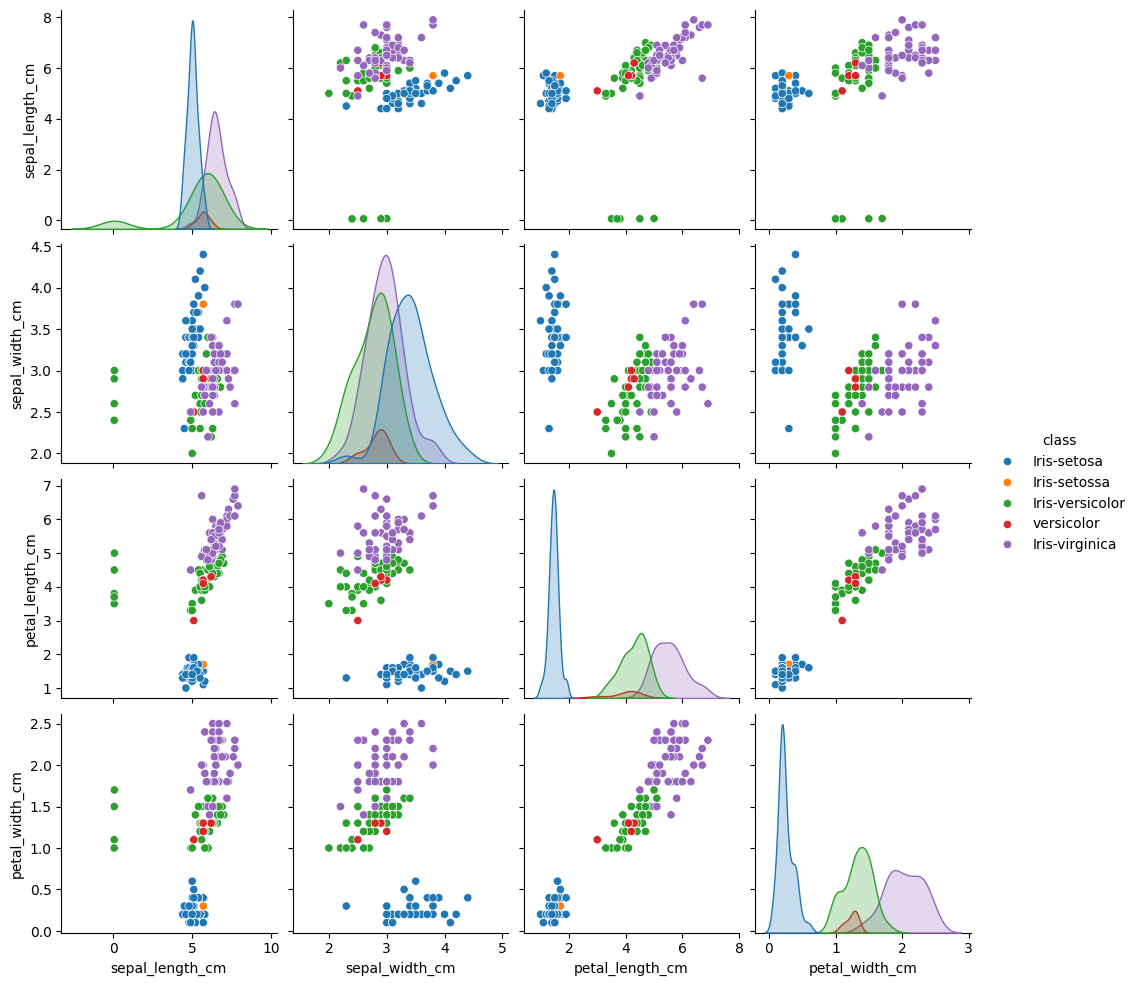

In [13]:
# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sns.pairplot(iris_data, hue='class')


From the scatterplot matrix, we can already see some issues with the data set:

1. There are five classes when there should only be three, meaning there were some coding errors.

2. There are some clear outliers in the measurements that may be erroneous: one `sepal_width_cm` entry for `Iris-setosa` falls well outside its normal range, and several `sepal_length_cm` entries for `Iris-versicolor` are near-zero for some reason.

3. We had to drop those rows with missing values.

In all of these cases, we need to figure out what to do with the erroneous data. Which takes us to the next step...

## Step 3: Tidying the data

### GIGO principle

[[ go back to the top ]](#Table-of-contents)

Now that we've identified several errors in the data set, we need to fix them before we proceed with the analysis.

Let's walk through the issues one-by-one.

>There are five classes when there should only be three, meaning there were some coding errors.

After talking with the field researchers, it sounds like one of them forgot to add `Iris-` before their `Iris-versicolor` entries. The other extraneous class, `Iris-setossa`, was simply a typo that they forgot to fix.

Let's use the DataFrame to fix these errors.

In [14]:
iris_data['class'].unique() # we can use unique to obtain all uniques in some column or columns

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [16]:
# one idea is to stop / break early
# we can use assertions
# assert len(iris_data['class'].unique()) == 3, "There should be only three classes!!"
# print("We have 3 classes all is good!") # that's a lie if we skipped the assertion...

In [17]:
iris_data['class'].value_counts() # value counts gives us closer look at different counts for uniques

,count
class,
Iris-virginica,50
Iris-setosa,49
Iris-versicolor,45
versicolor,5
Iris-setossa,1


In [18]:
# if I am afraid of changes I could make a copy in memory first
iris_data_copy = iris_data.copy() # makes a shallow copy
# shape
print(f"Shape of iris_data {iris_data.shape}")
print(f"Shape of iris_data_copy {iris_data_copy.shape}")
# are they currently same?
print(f"Are they same? {iris_data.equals(iris_data_copy)}")

Shape of iris_data (150, 5)
Shape of iris_data_copy (150, 5)
Are they same? True


In [19]:
# Copy and Replace
# I find all instances of versicolor and replace it with Iris-versicolor in the same column
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data['class'].unique()
# so essentially this is a copy and replace for a particular column


array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [20]:
iris_data['class'].value_counts()

,count
class,
Iris-virginica,50
Iris-versicolor,50
Iris-setosa,49
Iris-setossa,1


In [21]:
# So we take a row where a specific column('class' here) matches our bad values
# and change them to good values

iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'
# there are alternative ways of changing iris-setossa to iris-setos for example with str and regular expression search and replace

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
# let's make one more assertion
assert len(iris_data['class'].unique()) == 3, "There should be only three classes!!"
print("We have 3 classes all is good!") # this line will only run if above assertion is Correct!

We have 3 classes all is good!


In [23]:
# let's compare iris_data with iris_data_copy
print(f"Are they same? {iris_data.equals(iris_data_copy)}")

Are they same? False


In [24]:
# let's extract rows where there are differences between iris_data and iris_data_copy
# We can compare the two dataframes and select rows where they are not equal
differences = iris_data[~iris_data.eq(iris_data_copy).all(axis=1)]
differences.dropna() # we just do not show the rows with nans

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
18,5.7,3.8,1.7,0.3,Iris-setosa
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [25]:
# interestingly NaN is not the same as Nan
# let's check
print(f"NaN == Nan? {float('nan') == float('nan')}")

NaN == Nan? False


In [26]:
# let's only find where class column is different in iris_data from iris_data_copy
iris_data[iris_data['class'] != iris_data_copy['class']]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
18,5.7,3.8,1.7,0.3,Iris-setosa
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [27]:
# let's find the original rows in irics_data_copy that are not equal with iris_data class
iris_data_copy[iris_data_copy['class'] != iris_data['class']]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
18,5.7,3.8,1.7,0.3,Iris-setossa
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


In [28]:
iris_data.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
iris_data[98:103] # let's look around 66% mark

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica


Much better! Now we only have three class types. Imagine how embarrassing it would've been to create a model that used the wrong classes.

>There are some clear outliers in the measurements that may be erroneous: one `sepal_width_cm` entry for `Iris-setosa` falls well outside its normal range, and several `sepal_length_cm` entries for `Iris-versicolor` are near-zero for some reason.

Fixing outliers can be tricky business. It's rarely clear whether the outlier was caused by measurement error, recording the data in improper units, or if the outlier is a real anomaly. For that reason, we should be judicious when working with outliers: if we decide to exclude any data, we need to make sure to document what data we excluded and provide solid reasoning for excluding that data. (i.e., "This data didn't fit my hypothesis" will not stand peer review.)

In the case of the one anomalous entry for `Iris-setosa`, let's say our field researchers know that it's impossible for `Iris-setosa` to have a sepal width below 2.5 cm. Clearly this entry was made in error, and we're better off just scrapping the entry than spending hours finding out what happened.

In [30]:
iris_data.loc[(iris_data['sepal_width_cm'] < 2.5)] # this is not specific enough as it covers other irises besides setosa

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
41,4.500,2.3,1.3,0.3,Iris-setosa
53,5.500,2.3,4.0,1.3,Iris-versicolor
57,4.900,2.4,3.3,1.0,Iris-versicolor
60,5.000,2.0,3.5,1.0,Iris-versicolor
62,6.000,2.2,4.0,1.0,Iris-versicolor
68,6.200,2.2,4.5,1.5,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor
87,6.300,2.3,4.4,1.3,Iris-versicolor
93,5.000,2.3,3.3,1.0,Iris-versicolor


In [31]:
smallpetals = iris_data.loc[(iris_data['sepal_width_cm'] < 2.5) & (iris_data['class'] == 'Iris-setosa')]
smallpetals

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
41,4.5,2.3,1.3,0.3,Iris-setosa


<Axes: >

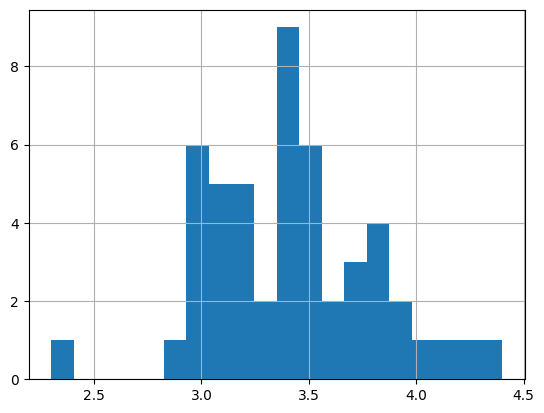

In [32]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist(bins=20)

<Axes: >

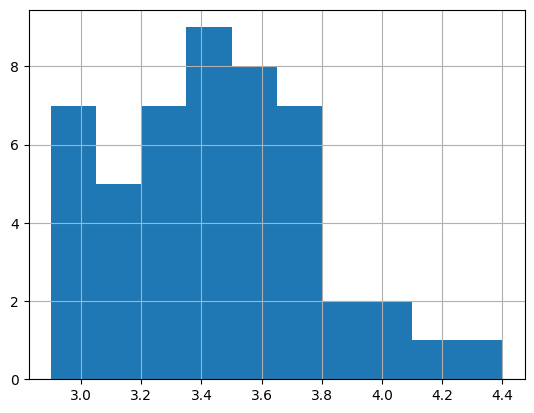

In [33]:
# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
# Let's go over this command in class
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)] # this rule applies to setosa then # so | means OR filter (actually bit or)
# TODO Alternative way by dropping specific row using drop method
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()


In [34]:
# let's check our shape for iris_data
iris_data.shape

(149, 5)

Excellent! Now all of our `Iris-setosa` rows have a sepal width greater than 2.5.

The next data issue to address is the several near-zero sepal lengths for the `Iris-versicolor` rows. Let's take a look at those rows.

In [35]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


How about that? All of these near-zero `sepal_length_cm` entries seem to be off by two orders of magnitude, as if they had been recorded in meters instead of centimeters.

After some brief correspondence with the field researchers, we find that one of them forgot to convert those measurements to centimeters. Let's do that for them.

<Axes: >

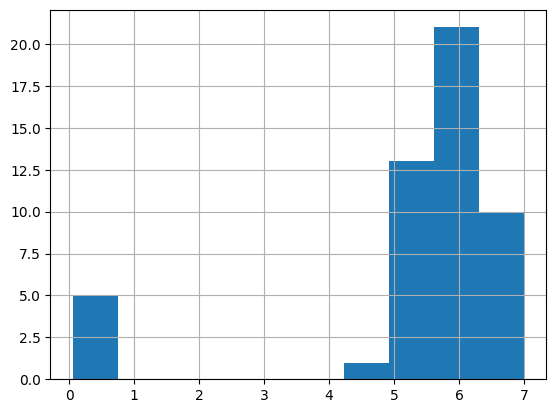

In [36]:
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

<Axes: >

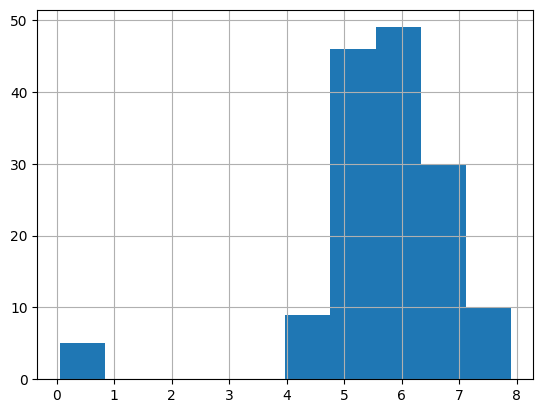

In [37]:
iris_data['sepal_length_cm'].hist() # this is for all types of irises

''

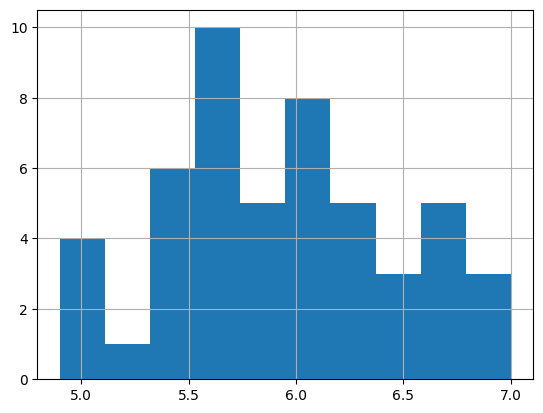

In [38]:
# Here we fix the wrong units
# careful to run this only once!!!

iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0 # similary we could use substraction -= addition to itself += or division by itself /=
# so we filter for veriscolor class AND (using & bit filter) sepal_length under 1.0 and then only column sepal_length_cm is multiplied in those matches by 100

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()
;

<Axes: >

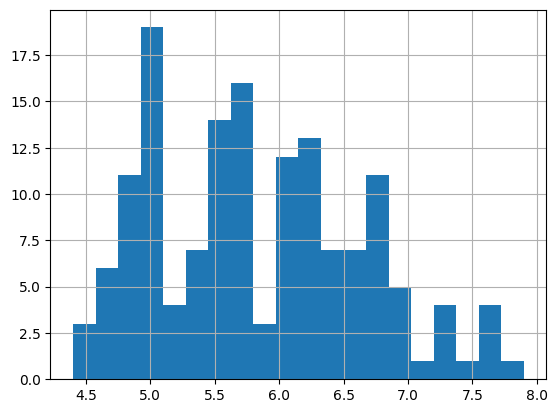

In [39]:
iris_data['sepal_length_cm'].hist(bins=20)

Phew! Good thing we fixed those outliers. They could've really thrown our analysis off.

>We had to drop those rows with missing values.

Let's take a look at the rows with missing values:

In [41]:
# this filters and shows rows where any of specified columns have a null value
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [42]:
# in fact we could have filtered for isnull() for any column with following
iris_data.isnull().any()

,0
sepal_length_cm,False
sepal_width_cm,False
petal_length_cm,False
petal_width_cm,True
class,False


It's not ideal that we had to drop those rows, especially considering they're all `Iris-setosa` entries. Since it seems like the missing data is systematic — all of the missing values are in the same column for the same *Iris* type — this error could potentially bias our analysis.

One way to deal with missing data is **mean imputation**: If we know that the values for a measurement fall in a certain range, we can fill in empty values with the average of that measurement.

Let's see if we can do that here.

<Axes: >

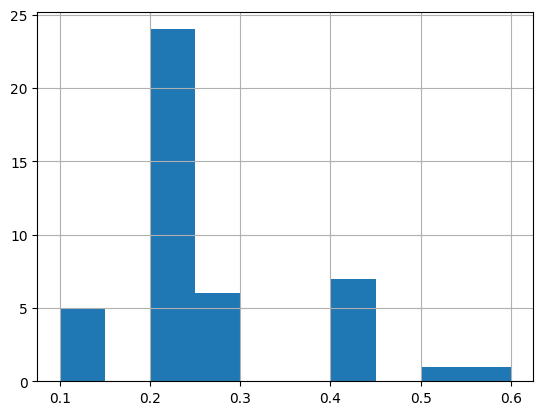

In [43]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()


Most of the petal widths for `Iris-setosa` fall within the 0.2-0.3 range, so let's fill in these entries with the average measured petal width.

In [ ]:
# Floating point data typesare tricky across all computers
# IEEE-754 standard
# usually computers hide this format from us, but it is still there
# Python shows us this
0.1+0.2, round(0.1+0.2, 4)

(0.30000000000000004, 0.3)

In [47]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

np.float64(0.24999999999999997)

In [46]:
# let's get overall mean for petal_width_cm
average_petal_width = iris_data['petal_width_cm'].mean()
print("Overall average mean for all classes", average_petal_width)

Overall average mean for all classes 1.2430555555555558


In [48]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()
print(average_petal_width)

0.24999999999999997


In [49]:
# let's round it to 4 digits after comma
average_petal_width = round(average_petal_width, 4)
print(average_petal_width)

0.25


In [50]:

# let's replace the null values with mean imputed values
iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width # so we put 0.25 here
# let's show the values
iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [51]:
# in fact we could have filtered for isnull() for any column with following
iris_data.isnull().any()

,0
sepal_length_cm,False
sepal_width_cm,False
petal_length_cm,False
petal_width_cm,False
class,False


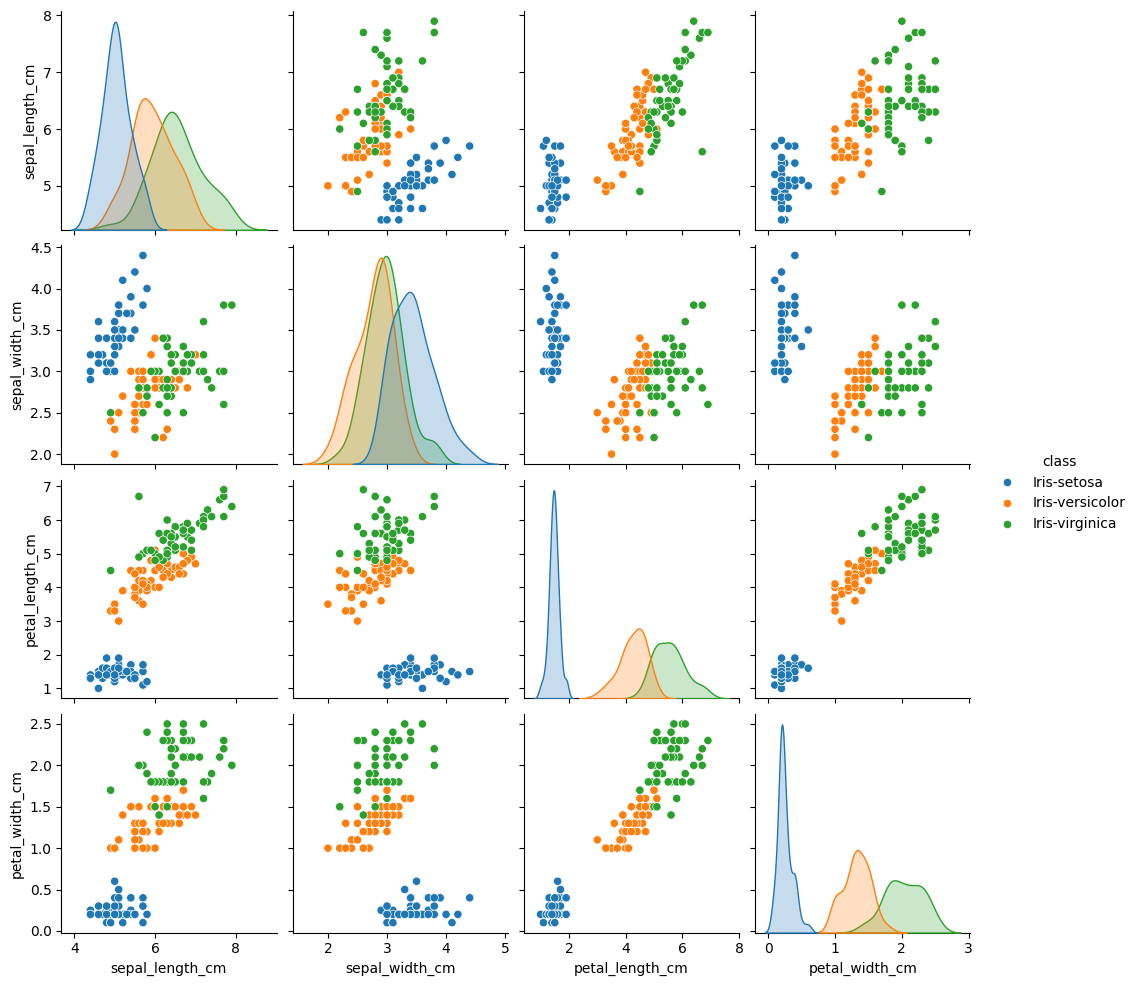

In [52]:
# let's pairwise plot with hue class
sns.pairplot(iris_data, hue='class')

In [53]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


Great! Now we've recovered those rows and no longer have missing data in our data set.

**Note:** If you don't feel comfortable imputing your data, you can drop all rows with missing data with the `dropna()` call:

    iris_data.dropna(inplace=True)

After all this hard work, we don't want to repeat this process every time we work with the data set. Let's save the tidied data file *as a separate file* and work directly with that data file from now on.

In [54]:
# let's make a data folder if it does not exist
from pathlib import Path
# on Colabe we want to make this folder under us, as child folder
Path('data').mkdir(exist_ok=True)

iris_data.to_json('data/iris-clean.json')

In [55]:
iris_data.to_csv('data/iris-data-clean.csv', index=False)



In [56]:
# again on colab we can also download to our local computer
from google.colab import files
files.download('data/iris-data-clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
# shape of iris_data
print(f"Iris data shape {iris_data.shape}")
cleanedframe = iris_data.dropna()
# cleaned frame shape
print(f"Cleaned frame shape {cleanedframe.shape}")

Iris data shape (149, 5)
Cleaned frame shape (149, 5)


### Loading Clean Data

In [58]:
# we can load already saved data locally we can load them up as new dataframe
iris_data_clean = pd.read_csv('data/iris-data-clean.csv')
# print shape
print(f"Shape of cleaned data: {iris_data_clean.shape}")
# head
iris_data_clean.head(12) # first 12

Shape of cleaned data: (149, 5)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.20,Iris-setosa
1,4.9,3.0,1.4,0.20,Iris-setosa
2,4.7,3.2,1.3,0.20,Iris-setosa
3,4.6,3.1,1.5,0.20,Iris-setosa
4,5.0,3.6,1.4,0.20,Iris-setosa
5,5.4,3.9,1.7,0.40,Iris-setosa
6,4.6,3.4,1.4,0.30,Iris-setosa
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa


Now, let's take a look at the scatterplot matrix now that we've tidied the data.

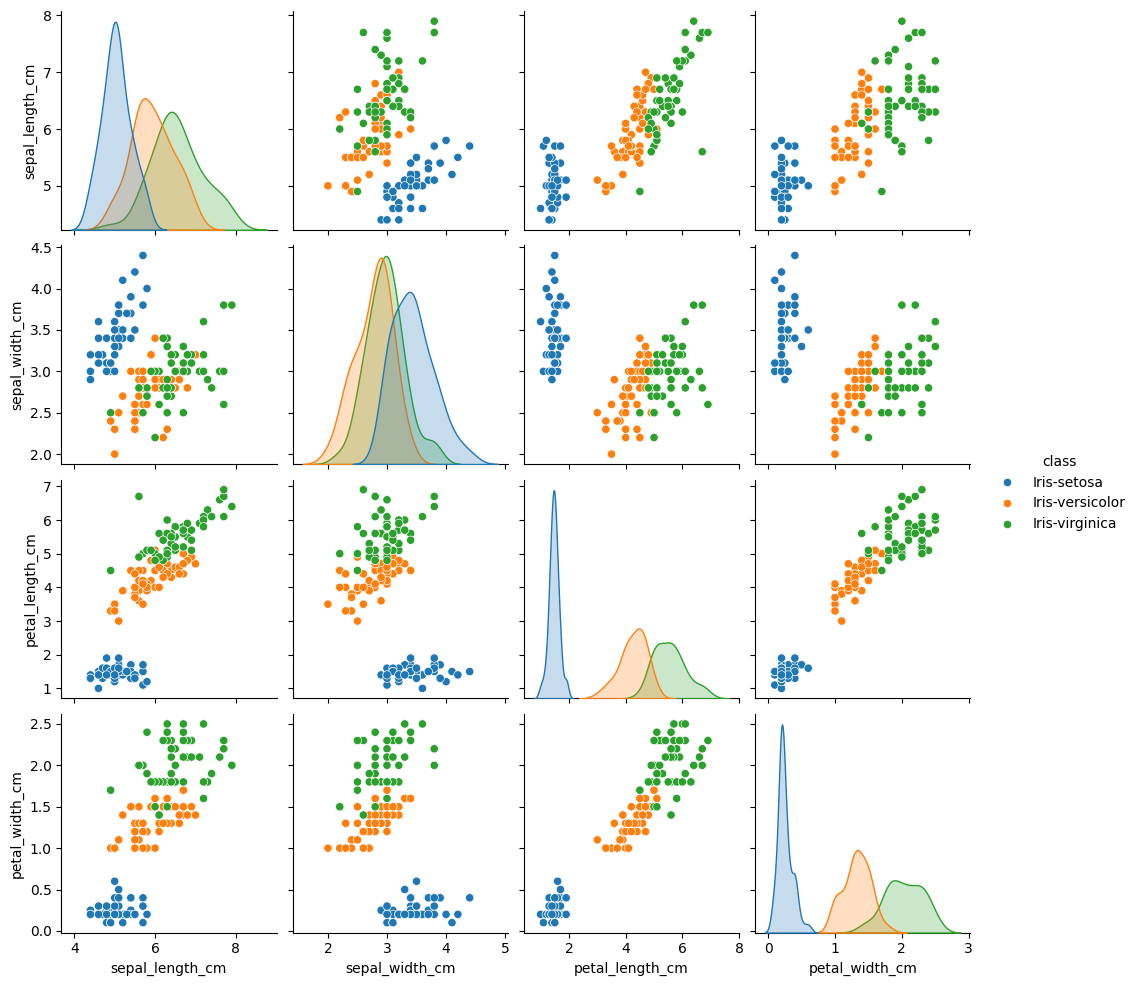

In [59]:
myplot = sns.pairplot(iris_data_clean, hue='class')
myplot.savefig('irises.png')

## 📊 `scipy.stats.entropy` Function  

The `scipy.stats.entropy` function is part of the **SciPy** library and is used to calculate the **Shannon entropy** (information entropy) of a distribution. Entropy is a measure of **uncertainty** or **information content** in a probability distribution.  

### 🔑 Key Points
- **Location in SciPy**:  
  ```python
  from scipy.stats import entropy


In [ ]:
# scipy is scientific Python library
# we will only use statistics module for this
import scipy.stats as stats

In [ ]:
# iris_data = pd.read_csv('../data/iris-data.csv')

In [ ]:
iris_data.columns.unique()

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

In [ ]:
stats.entropy(iris_data_clean['sepal_length_cm'])

np.float64(4.9947332367061925)

In [ ]:
2**5, len(iris_data_clean)

(32, 149)

In [ ]:
iris_data.columns[:-1]

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm'],
      dtype='object')

In [ ]:
# we go through list of column names except last one and get entropy
# for data (without missing values) in each column
for col in iris_data.columns[:-1]:
    print("Entropy for: ", col, stats.entropy(iris_data[col].dropna()))

Entropy for:  sepal_length_cm 4.9947332367061925
Entropy for:  sepal_width_cm 4.994187360273029
Entropy for:  petal_length_cm 4.88306851089088
Entropy for:  petal_width_cm 4.76945055275522


### 📏 Interpreting an Entropy Value of 5  

If `scipy.stats.entropy` returns **5**, the meaning depends on the logarithm base chosen:

- **Base 2 (bits):**  
  - Entropy = 5 bits means the distribution has the same uncertainty as a **uniform distribution over \(2^5 = 32\) equally likely outcomes**.  
  - In practice: you’d need **5 binary (yes/no) questions** on average to identify the outcome.  

- **Base *e* (nats, default):**  
  - Entropy = 5 nats means uncertainty equivalent to a uniform distribution over about \(e^5 \approx 148\) equally likely outcomes.  

- **Base 10 (decimal digits):**  
  - Entropy = 5 digits means uncertainty equivalent to a uniform distribution over \(10^5 = 100{,}000\) equally likely outcomes.  

---

### 🔑 Interpretation
- **High entropy (like 5)** → the distribution is very spread out, close to uniform, with many possible outcomes.  
- **Low entropy (close to 0)** → the distribution is concentrated, highly predictable, with only a few dominant outcomes.  

---

### 📊 Example Reference (Base 2)

| Entropy (bits) | Equivalent Uniform Outcomes |
|----------------|-----------------------------|
| 1              | 2 (coin toss)              |
| 2              | 4                           |
| 3              | 8                           |
| 4


In [ ]:
# let's make 149 values of 5
all_fives = [5] * 149
print(all_fives[:10])

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [ ]:
# let's calculate entropy of all_fives
stats.entropy(all_fives)

np.float64(5.003946305945458)

In [ ]:
# how about 149 random values from 0 to 200
import random
random_values = [random.randint(0, 200) for _ in range(149)]
print(random_values[:10])

[134, 89, 82, 184, 33, 196, 68, 15, 173, 81]


In [ ]:
stats.entropy(random_values)

np.float64(4.78485943399536)

## Takeaways from preliminary cleanup and preparation

Of course, I purposely inserted numerous errors into this data set to demonstrate some of the many possible scenarios you may face while tidying your data.

The general takeaways here should be:

* Make sure your data is encoded properly

* Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range

* Deal with missing data in one way or another: replace it if you can or drop it

* Never tidy your data manually because that is not easily reproducible

* Use code as a record of how you tidied your data

* Plot everything you can about the data at this stage of the analysis so you can *visually* confirm everything looks correct

## Bonus: Testing our data

[[ go back to the top ]](#Table-of-contents)

At SciPy 2015, I was exposed to a great idea: We should test our data. Just how we use unit tests to verify our expectations from code, we can similarly set up unit tests to verify our expectations about a data set.

We can quickly test our data using `assert` statements: We assert that something must be true, and if it is, then nothing happens and the notebook continues running. However, if our assertion is wrong, then the notebook stops running and brings it to our attention. For example,

```Python
assert 1 == 2
```

will raise an `AssertionError` and stop execution of the notebook because the assertion failed.

Let's test a few things that we know about our data set now.

In [ ]:
# first let's load our code
# iris_data_clean = pd.read_csv('../data/iris-data-clean.csv')
# instead we will load them from url
clean_url = "https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/raw/refs/heads/main/data/iris-data-clean.csv"
print(f"Reading data from {clean_url}")
iris_data_clean = pd.read_csv(clean_url)
# shape
print(f"Shape of cleaned data: {iris_data_clean.shape}")

Reading data from https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/raw/refs/heads/main/data/iris-data-clean.csv
Shape of cleaned data: (149, 5)


In [ ]:
# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

In [ ]:
# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

In [ ]:
# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

And so on. If any of these expectations are violated, then our analysis immediately stops and we have to return to the tidying stage.

### Data Cleanup & Wrangling > 80% time spent in Data Science

## Step 4: Exploratory analysis

[[ go back to the top ]](#Table-of-contents)

Now after spending entirely too much time tidying our data, we can start analyzing it!

Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

* How is my data distributed?

* Are there any correlations in my data?

* Are there any confounding factors that explain these correlations?

This is the stage where we plot all the data in as many ways as possible. Create many charts, but don't bother making them pretty — these charts are for internal use.

Let's return to that scatterplot matrix that we used earlier.

''

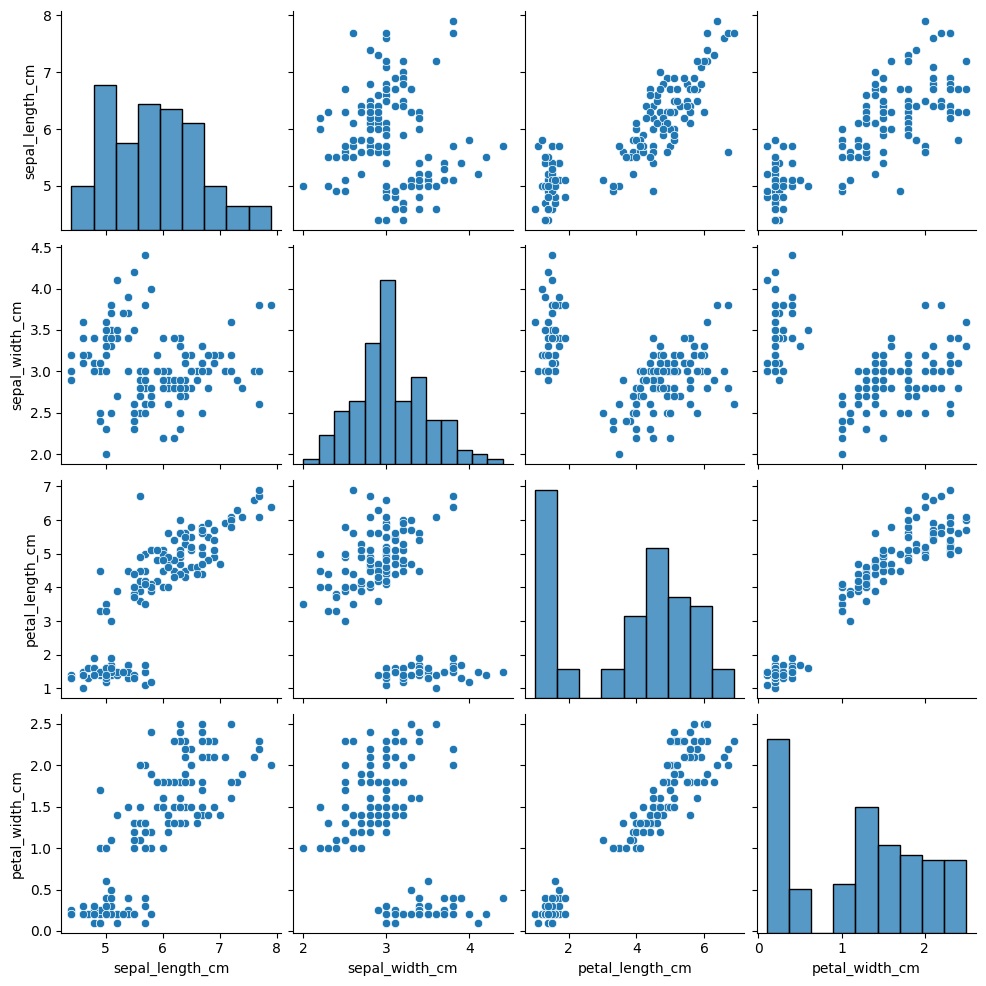

In [ ]:
# import seaborn as sns # we already did this
sns.pairplot(iris_data_clean)
;

Our data is normally distributed for the most part, which is great news if we plan on using any modeling methods that assume the data is normally distributed.

There's something strange going on with the petal measurements. Maybe it's something to do with the different `Iris` types. Let's color code the data by the class again to see if that clears things up.

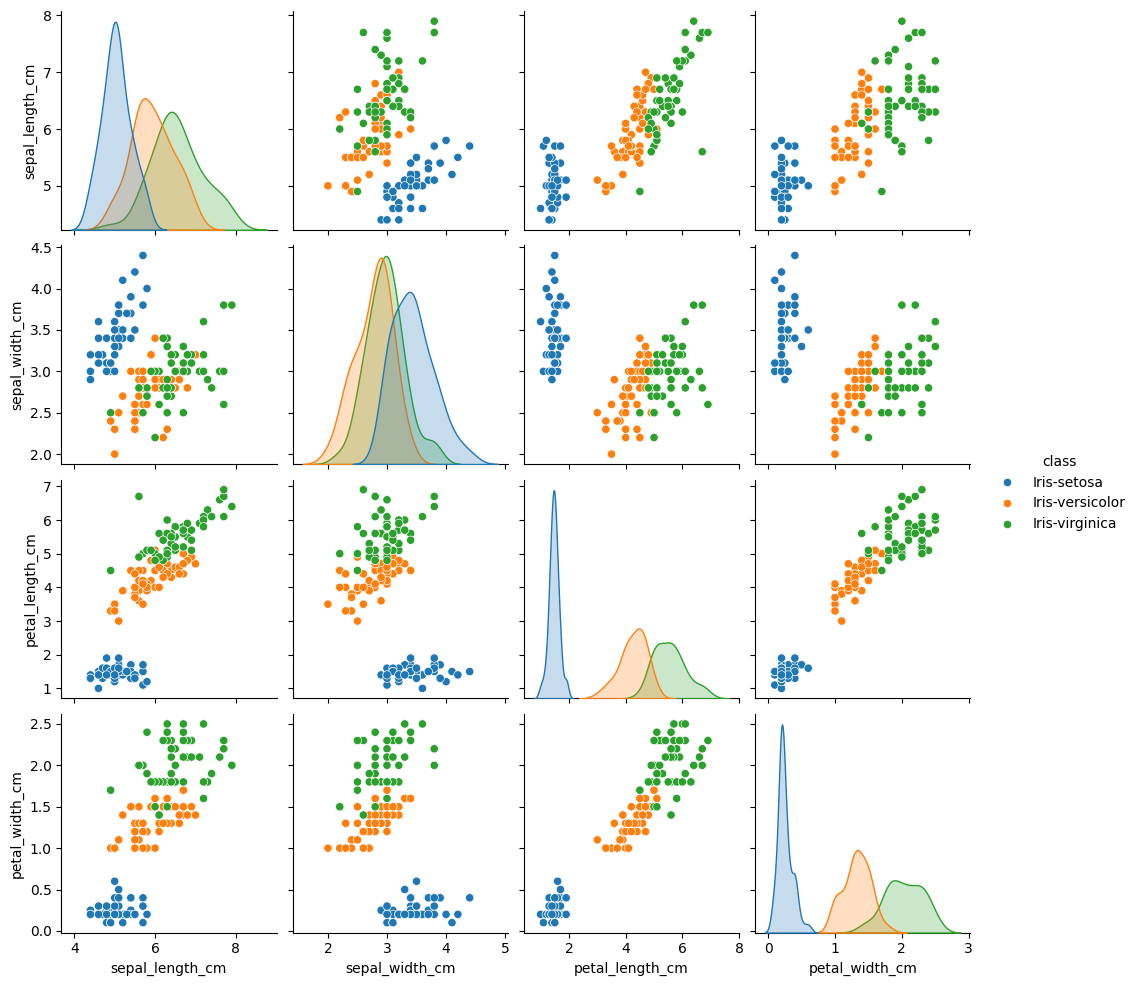

In [ ]:
sns.pairplot(iris_data_clean, hue='class')

<Axes: >

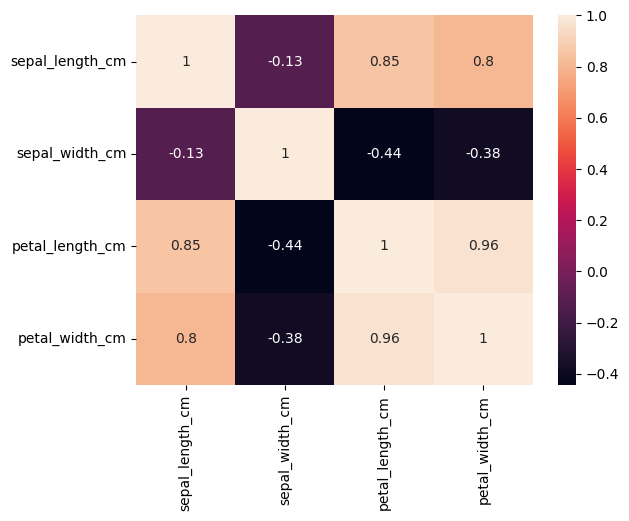

In [ ]:
# let's create correlation matrix for our numerical columns
numerical_only_df = iris_data_clean.select_dtypes(include=['number'])
corr_df = numerical_only_df.corr()
# let's create a heatmap
sns.heatmap(corr_df, annot=True)

Sure enough, the strange distribution of the petal measurements exist because of the different species. This is actually great news for our classification task since it means that the petal measurements will make it easy to distinguish between `Iris-setosa` and the other `Iris` types.

Distinguishing `Iris-versicolor` and `Iris-virginica` will prove more difficult given how much their measurements overlap.

There are also correlations between petal length and petal width, as well as sepal length and sepal width. The field biologists assure us that this is to be expected: Longer flower petals also tend to be wider, and the same applies for sepals.

We can also make [**violin plots**](https://en.wikipedia.org/wiki/Violin_plot) of the data to compare the measurement distributions of the classes. Violin plots contain the same information as [box plots](https://en.wikipedia.org/wiki/Box_plot), but also scales the box according to the density of the data.

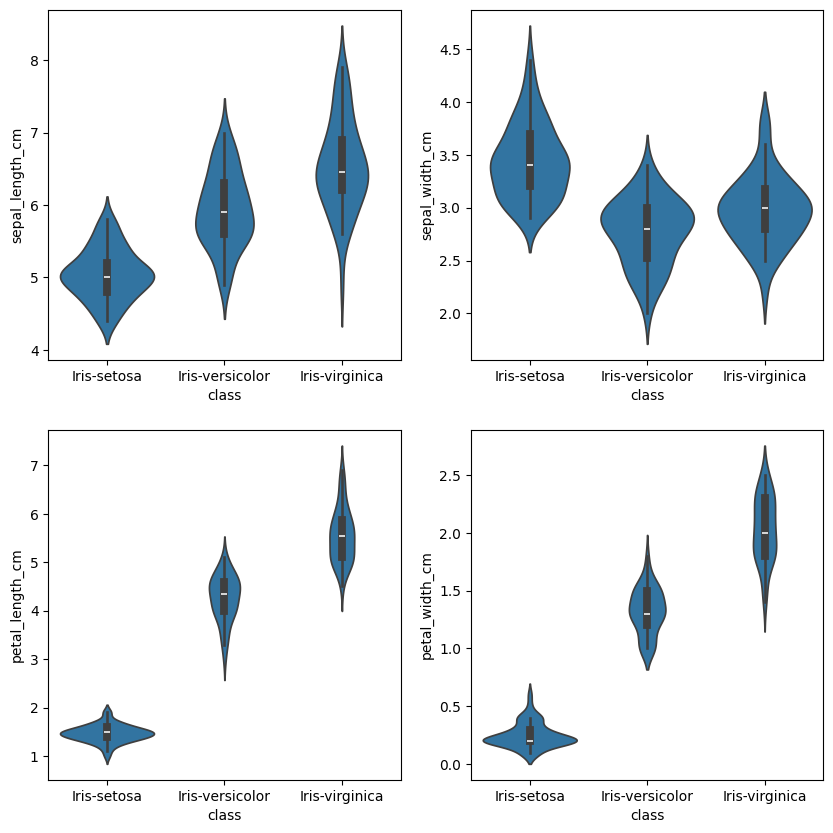

In [ ]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='class', y=column, data=iris_data_clean)

Enough flirting with the data. Let's get to modeling.

## Step 5: Classification

[[ go back to the top ]](#Table-of-contents)

Wow, all this work and we *still* haven't modeled the data!

As tiresome as it can be, tidying and exploring our data is a vital component to any data analysis. If we had jumped straight to the modeling step, we would have created a faulty classification model.

Remember: **Bad data leads to bad models.** Always check your data first.

<hr />

Assured that our data is now as clean as we can make it — and armed with some cursory knowledge of the distributions and relationships in our data set — it's time to make the next big step in our analysis: Splitting the data into training and testing sets.

A **training set** is a random subset of the data that we use to train our models.

A **testing set** is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

Especially in sparse data sets like ours, it's easy for models to **overfit** the data: The model will learn the training set so well that it won't be able to handle most of the cases it's never seen before. This is why it's important for us to build the model with the training set, but score it with the testing set.

Note that once we split the data into a training and testing set, we should treat the testing set like it no longer exists: We cannot use any information from the testing set to build our model or else we're cheating.

Let's set up our data first.

In [ ]:
# iris_data_clean = pd.read_csv('data/iris-data-clean.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values
# all_inputs will be NumPy matrix
# all_inputs is also commonly marked as uppercase X

# Similarly, we can extract the class labels - answers
all_labels = iris_data_clean['class'].values
# labels (answers) are typically names with y

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
all_labels[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [ ]:
iris_data_clean.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
all_labels[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [ ]:
type(all_labels) # indeed this is Numpy array

numpy.ndarray

In [ ]:
# shape of all_values and labels
all_inputs.shape, all_labels.shape

((149, 4), (149,))

Now our data is ready to be split.

## 🧪 Train–Test Split

- In **machine learning**, we usually split our dataset into **training** and **testing** parts.  
  - **Training set**: used to fit (train) the model.  
  - **Test set**: used to evaluate how well the model generalizes to unseen data.  
- This prevents **overfitting** (the model memorizing training data rather than learning general patterns).  
- A common split is **70–80% training** and **20–30% testing**, but the exact ratio depends on dataset size and problem type.

### How `scikit-learn` does it
- `scikit-learn` provides the function `train_test_split` in `sklearn.model_selection`.  
- It can split arrays, DataFrames, or matrices into random **train** and **test** subsets.  
- Key parameters include:  
  - `test_size` (float or int): proportion/absolute size of the test set.  
  - `train_size`: optional, if not specified it’s the complement of `test_size`.  
  - `random_state`: ensures reproducibility by fixing the random seed.  
  - `shuffle`: whether to shuffle data before splitting (default is `True`).  
- The function returns four subsets: **X_train, X_test, y_train, y_test**.  

This makes it very convenient to quickly prepare data for modeling and evaluation.


In [ ]:
from sklearn.model_selection import train_test_split # scikit-learn is a huge library so we only import one function for now -> train_test_split

In [ ]:
all_inputs[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
iris_data_clean.head(3)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
all_labels[:3]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [ ]:
# Here we split our data into training and testing data

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=2025)
 # test_size 0.25 means we have 75% training and 25% testing
 # random_state is simply to have a specific split - random is actually pseudo random
 # so training_inputs also often called X_train
 # so testing_inputs often called X_test
 # training classes y_train
 # testing_classes y_test

In [ ]:
training_inputs[:5]

array([[4.9 , 3.1 , 1.5 , 0.1 ],
       [4.4 , 2.9 , 1.4 , 0.25],
       [5.5 , 2.5 , 4.  , 1.3 ],
       [4.7 , 3.2 , 1.6 , 0.2 ],
       [5.2 , 2.7 , 3.9 , 1.4 ]])

In [ ]:
testing_inputs[:5]

array([[4.7, 3.2, 1.3, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [6.9, 3.1, 5.4, 2.1],
       [6.4, 2.8, 5.6, 2.2],
       [5.1, 3.5, 1.4, 0.2]])

In [ ]:
testing_classes[:5]

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [ ]:
training_classes[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [ ]:
# let's see shape of our training and testing inputs and classes
print(f"Shape of training inputs: {training_inputs.shape}")
print(f"Shape of training classes: {training_classes.shape}")
print(f"Shape of testing inputs: {testing_inputs.shape}")
print(f"Shape of testing classes: {testing_classes.shape}")

Shape of training inputs: (111, 4)
Shape of training classes: (111,)
Shape of testing inputs: (38, 4)
Shape of testing classes: (38,)


In [ ]:
# length of our original data
len(all_inputs)

149

In [ ]:
111/149, 38/149 # so roughly 75/25 split thats where the 0.25 came in

(0.7449664429530202, 0.2550335570469799)

With our data split, we can start fitting models to our data. Our company's Head of Data is all about decision tree classifiers, so let's start with one of those.

Decision tree classifiers are incredibly simple in theory. In their simplest form, decision tree classifiers ask a series of Yes/No questions about the data — each time getting closer to finding out the class of each entry — until they either classify the data set perfectly or simply can't differentiate a set of entries. Think of it like a game of [Twenty Questions](https://en.wikipedia.org/wiki/Twenty_Questions), except the computer is *much*, *much* better at it.

Here's an example decision tree classifier:

<img src="https://github.com/ValRCS/RBS_LIFT_AI_ML_Models/blob/main/img/iris_dtc.png?raw=1" />

Notice how the classifier asks Yes/No questions about the data — whether a certain feature is <= 1.75, for example — so it can differentiate the records. This is the essence of every decision tree.

The nice part about decision tree classifiers is that they are **scale-invariant**, i.e., the scale of the features does not affect their performance, unlike many Machine Learning models. In other words, it doesn't matter if our features range from 0 to 1 or 0 to 1,000; decision tree classifiers will work with them just the same.

There are several [parameters](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) that we can tune for decision tree classifiers, but for now let's use a basic decision tree classifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier # we import a specific classificator from sklearn.tree

# Create the classifier object from class
decision_tree_classifier = DecisionTreeClassifier() # here we have a fresh desicion tree classifier object creater with default hyperparameters

# Train the classifier on the training set - important ON TRAINING DATA ONLY!
decision_tree_classifier.fit(training_inputs, training_classes)
# here we have a working model
# we can predict or we can score multiple inputs
# here we would test the score on Testing inputs

# Validate the classifier on the testing set using classification accuracy
dec_tree_score = decision_tree_classifier.score(testing_inputs, testing_classes)
print(f"Our decision tree model has accuracy of {dec_tree_score}")

Our decision tree model has accuracy of 0.9210526315789473


In [ ]:
# we can use this to predict specific class
testing_inputs[:1] # note [:1] not [1] we need 2d matrix in this case 1x4 but still 2D note the double [[]]

array([[4.7, 3.2, 1.3, 0.2]])

In [ ]:
# let's predict one label from one set of observations / features
decision_tree_classifier.predict(testing_inputs[:1])

array(['Iris-setosa'], dtype=object)

In [ ]:
decision_tree_classifier.predict(testing_inputs[:5]) #make predictions for first five

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [ ]:
# how about just some made up data
# so I still need a 2D list even if I have one flower
# so we create a 2D list with single entry inside
my_flower = [[3.5, 2.7,3.9,6.7]] # completely fake data
decision_tree_classifier.predict(my_flower)

array(['Iris-versicolor'], dtype=object)

In [ ]:
# how about completely nonsensical for some huge flower
huge_flower = [[100,200,500,9000]]
decision_tree_classifier.predict(huge_flower)
# so this type of model WILL give answer as long as correct data type is given, but not necessary meaningful measurement
# so ALL Models are Wrong, but some models are useful

array(['Iris-virginica'], dtype=object)

In [ ]:
# how about all negative inputs?
negative_flower = [[-100,-200,-500,-9000]]
decision_tree_classifier.predict(negative_flower)

array(['Iris-setosa'], dtype=object)

In [ ]:
# All Models are wrong, but some are useful - many staticians have said something like that

In [ ]:
# how about the training data - usually that should be pretty close to 100%
# again high score is expected here it does not mean the model is good
decision_tree_classifier.score(training_inputs, training_classes)
# it would be shocking if it was under 99% - usually 100%
# if it is say only 60% then that would indicate not enough training was done.

1.0

In [ ]:
150*0.25

37.5

In [ ]:
len(testing_inputs)

38

In [ ]:
# How the accuracy score came about 35 out of 38 correct
35/38

0.9210526315789473

In [ ]:
# you can use this in class exercise later
from sklearn import svm # support vector machine
svm_classifier = svm.SVC(gamma = 'scale')

In [ ]:
svm_classifier.fit(training_inputs, training_classes) # so all the work training is done here!

SVC()

In [ ]:
svm_classifier.score(testing_inputs, testing_classes)

0.9473684210526315

In [ ]:
svm_classifier = svm.SVC(gamma = 'scale')
svm_classifier.fit(training_inputs, training_classes)
svm_classifier.score(testing_inputs, testing_classes)

0.9473684210526315

Heck yeah! Our model achieves 97% classification accuracy without much effort.

However, there's a catch: Depending on how our training and testing set was sampled, our model can achieve anywhere from 80% to 100% accuracy:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from tqdm import tqdm # this is for progress bars simple cosmetic library
# if you do not have it install it with pip install tqdm but google colab has it

100%|██████████| 1000/1000 [00:02<00:00, 449.73it/s]


''

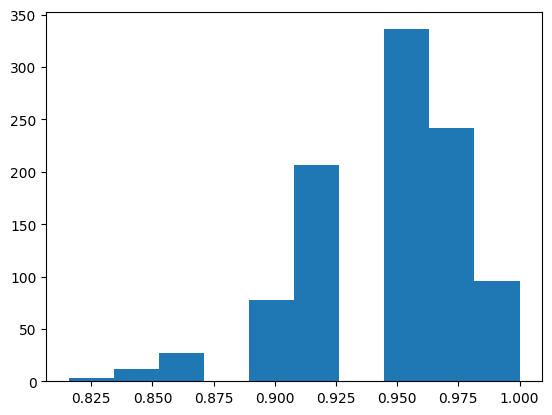

In [ ]:
# here we randomly split data 1000 times in differrent training and test sets
model_accuracies = [] # we will use this list to store accuracies
NUM_SPLITS = 1000
TEST_SIZE = 0.25

for repetition in tqdm(range(NUM_SPLITS)):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=TEST_SIZE) # note no seed, so NUM_SPLITS random splits

    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies)
;

In [ ]:
# let's transfer model_accuracies to new dataframe
accuracy_df = pd.DataFrame({'accuracy': model_accuracies})
accuracy_df.head()

,accuracy
0,0.868421
1,0.973684
2,0.947368
3,0.947368
4,0.921053


In [ ]:
# now value counts
accuracy_df['accuracy'].value_counts()

,count
accuracy,
0.947368,336
0.973684,242
0.921053,206
1.000000,96
0.894737,78
0.868421,27
0.842105,12
0.815789,3


In [ ]:
100/38

2.6315789473684212

It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. This phenomenon is known as **overfitting**: The model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before.

### Cross-validation

[[ go back to the top ]](#Table-of-contents)

This problem is the main reason that most data scientists perform ***k*-fold cross-validation** on their models: Split the original data set into *k* subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. This process is then repeated *k* times such that each subset is used as the testing set exactly once.

10-fold cross-validation is the most common choice, so let's use that here. Performing 10-fold cross-validation on our data set looks something like this:

(each square is an entry in our data set)

In [ ]:
# new text

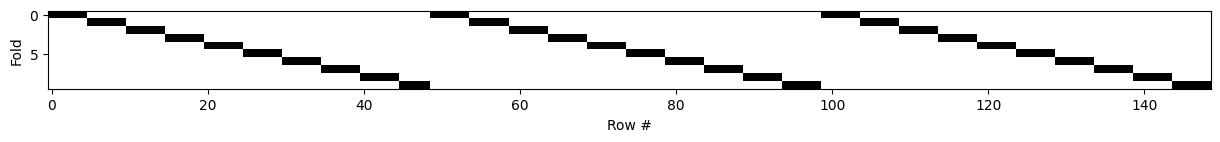

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold # we want Stratified because we want our test sets to always have same proportion of classes
# we want Stratified when our data measurements is somehow ordered

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)

    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

You'll notice that we used **Stratified *k*-fold cross-validation** in the code above. Stratified *k*-fold keeps the class proportions the same across all of the folds, which is vital for maintaining a representative subset of our data set. (e.g., so we don't have 100% `Iris setosa` entries in one of the folds.)

We can perform 10-fold cross-validation on our model with the following code:

In [ ]:
# from sklearn.model_selection import cross_val_score

''

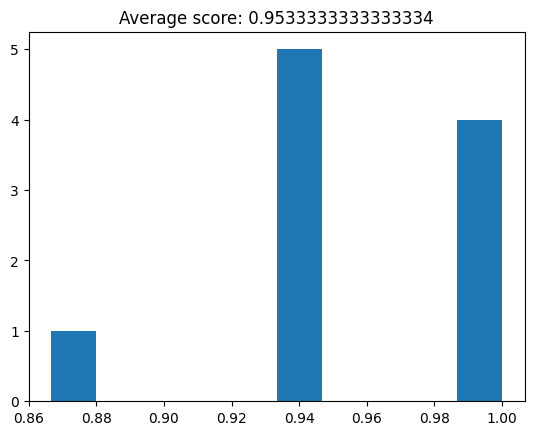

In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier() # the model is just created but not trained yet

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
# so if we supply integere to cv parameter - Stratified KFold will be used
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
# so 10 means we will be using stratified 90/10 splits between training/testing data for each fold
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [ ]:
len(all_inputs.T[1])

149

In [ ]:
14/15, 13/14, 13/15

(0.9333333333333333, 0.9285714285714286, 0.8666666666666667)

Now we have a much more consistent rating of our classifier's general classification accuracy.

### Parameter tuning

[[ go back to the top ]](#Table-of-contents)

Every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier. For example, if we severely limit the depth of our decision tree classifier:

''

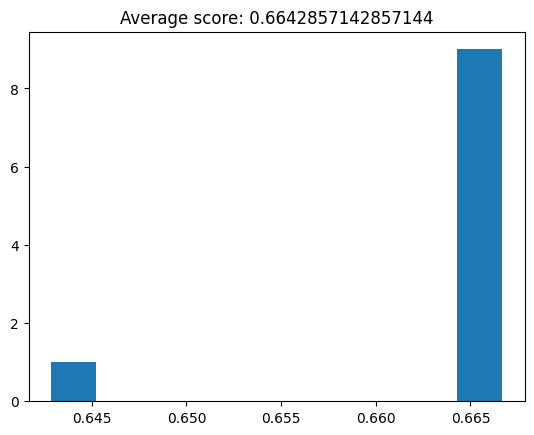

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1) # so only single question allowed

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

the classification accuracy falls tremendously.

Therefore, we need to find a systematic method to discover the best parameters for our model and data set.

The most common method for model parameter tuning is **Grid Search**. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

In [ ]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()
# documentation for DecisionTreeClassifier at scikit-learn
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# so we create a Python dictionary where keys are names of the specific classifier hyper-paramaters we want to tune
# so we supply ALL possible values for each hyperparameter for particular model

# we use normal Python dictionary for passing in possible values
# keys are hyperparameter names for particular classificator
# values are lists of values to check
parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

# here we created the grid search object
grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid, # here the param_grid names should match parameters in the classifiers
                           cv=cross_validation)

# the actual fitting (looping through all the grid value combinations) here

grid_search.fit(all_inputs, all_labels) # here the actually looping starts and finishes so 4*5*10 runs of model here

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameters: {'max_depth': 3, 'max_features': 4}


Now let's visualize the grid search to see how the parameters interact.

In [ ]:
grid_search.cv_results_['mean_test_score']

array([0.61761905, 0.66428571, 0.66428571, 0.66428571, 0.85238095,
       0.88571429, 0.94      , 0.94666667, 0.91333333, 0.95333333,
       0.95333333, 0.96      , 0.93952381, 0.93285714, 0.96      ,
       0.95333333, 0.94666667, 0.95333333, 0.94666667, 0.95333333])

''

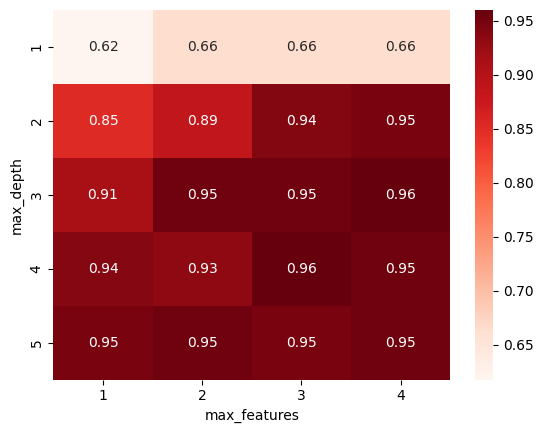

In [ ]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4) # we need to change to appropriate shape we had 5 x 4 combinations
sns.heatmap(grid_visualization, cmap='Reds', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

Now we have a better sense of the parameter space: We know that we need a `max_depth` of at least 2 to allow the decision tree to make more than a one-off decision.

`max_features` doesn't really seem to make a big difference here as long as we have 2 of them, which makes sense since our data set has only 4 features and is relatively easy to classify. (Remember, one of our data set's classes was easily separable from the rest based on a single feature.)

Let's go ahead and use a broad grid search to find the best settings for a handful of parameters.

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)
# so we supply ALL of our cleaned and prepared data here, note the data is split into X matrix of all_inputs
# and all_labels (often called y) which is the ground truth for each row/measurement
grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9600000000000002
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'splitter': 'best'}


Now we can take the best classifier from the Grid Search and use that:

In [ ]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(max_depth=4, max_features=2)

In [ ]:
# let's save / persist our decision_tree_classifier for future work
import pickle # this is Python's library for pickling pretty much any objects including our models
pickle.dump(decision_tree_classifier, open('iris_dtc.pkl', 'wb'))

In [ ]:
# i can download this model to my computer
from google.colab import files
files.download('iris_dtc.pkl') # just remember this is NOT text format, this needs to be loaded again by pickle ( unpickle / deserialize)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# i can load this model
loaded_model = pickle.load(open('iris_dtc.pkl', 'rb')) #note 'rb' means read binary
# show type
type(loaded_model)

sklearn.tree._classes.DecisionTreeClassifier

In [ ]:
loaded_model

DecisionTreeClassifier(max_depth=4, max_features=2)

We can even visualize the decision tree with [GraphViz](http://www.graphviz.org/) to see how it's making the classifications:

In [ ]:
import sklearn.tree as tree
from io import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

### Installing graphviz if not present

To display dot files we needs to install graphviz package which is not present in default Google Colab environment as of August of 2025. It is less used and thus Google has chosen not to include it.

However since Colab runs under Ubuntu it is very easy to install non standard packages in this temporary environment.

apt-get is a standard  Linux package manager for Debian based distributions including Ubuntu and others.

pip is standard Python package manager

In [ ]:
# Install Graphviz (system binaries + Python wrapper)
# ! means we run terminal commands from colab - in this case on Ubuntu which is a type of Linux Operating System
!apt-get -qq install -y graphviz
!pip -q install graphviz

# Import and display the DOT file
from graphviz import Source
from IPython.display import display # TODO check if this is still needed

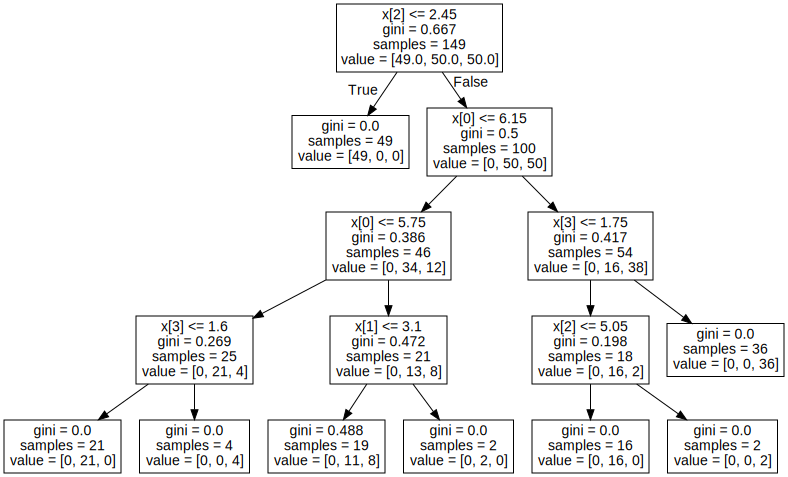

In [ ]:
src = Source.from_file("iris_dtc.dot")
src.format = "png"   # use "png" if you prefer raster images
# src.format = "svg"   # use "svg" if you prefer vector images
display(src)

### Previous Decision Tree

For comparison and fallback purposes the original decision tree.

<img src="https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/img/irises/iris_dtc.png?raw=true" />

(This classifier may look familiar from earlier in the notebook.)

Alright! We finally have our demo classifier. Let's create some visuals of its performance so we have something to show our company's Head of Data.

''

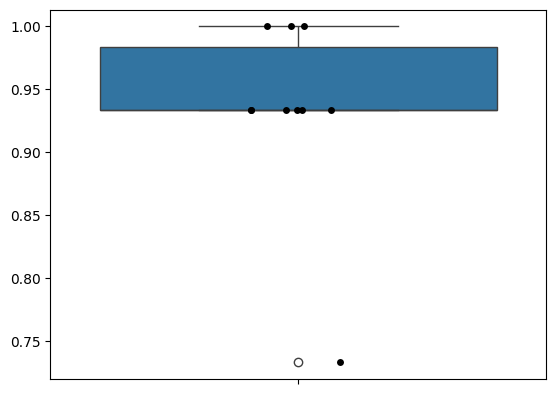

In [ ]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black')
;

Hmmm... that's a little boring by itself though. How about we compare another classifier to see how they perform?

We already know from previous projects that Random Forest classifiers usually work better than individual decision trees. A common problem that decision trees face is that they're prone to overfitting: They complexify to the point that they classify the training set near-perfectly, but fail to generalize to data they have not seen before.

**Random Forest classifiers** work around that limitation by creating a whole bunch of decision trees (hence "forest") — each trained on random subsets of training samples (drawn with replacement) and features (drawn without replacement) — and have the decision trees work together to make a more accurate classification.

Let that be a lesson for us: **Even in Machine Learning, we get better results when we work together!**

Let's see if a Random Forest classifier works better here.

The great part about scikit-learn is that the training, testing, parameter tuning, etc. process is the same for all models, so we only need to plug in the new classifier.

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
# we do need to look up documentation for RandomForestClassifier to see which hyperparameters we can tune


### Link to RandomForestClassifier documentation

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

We need to see what hyperparemeters are applicable to particular model before we can GridSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

# so these hyperparameters are gotten by reading documentation above
parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9666666666666666
Best parameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 100}


RandomForestClassifier(max_features=1)

In [ ]:
decision_tree_classifier

DecisionTreeClassifier(max_depth=4, max_features=2)

Now we can compare their performance:

Shape of both_df: (20, 2)


<Axes: xlabel='classifier', ylabel='accuracy'>

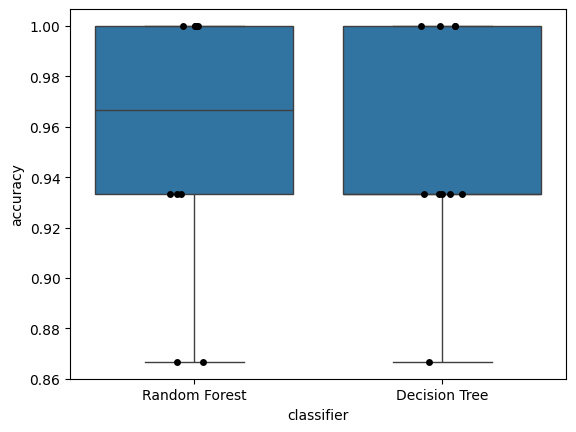

In [ ]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
# let's add dt_df to rf_df dataframe
both_df = pd.concat([rf_df, dt_df]) # we glue the dataframes together
# here we could just save to excel here
both_df.to_excel("Model_comparision.xlsx")
print(f"Shape of both_df: {both_df.shape}")
both_df.head()

sns.boxplot(x='classifier', y='accuracy', data=both_df)
sns.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')
# ;

In [ ]:
dt_df.tail()

,accuracy,classifier
5,0.866667,Decision Tree
6,0.933333,Decision Tree
7,0.933333,Decision Tree
8,1.000000,Decision Tree
9,1.000000,Decision Tree


How about that? They both seem to perform about the same on this data set. This is probably because of the limitations of our data set: We have only 4 features to make the classification, and Random Forest classifiers excel when there's hundreds of possible features to look at. In other words, there wasn't much room for improvement with this data set.

## 🧑‍💻 Class Exercise (30–45 min)

Work through the following tasks using the **Iris dataset** and scikit-learn:

- 🔄 **Try a different train/test split**  
  - Experiment with 60/40, 70/30, or 80/20 splits.  
  - Observe how model performance changes.  

- 🤖 **Train a different model**  
  - Choose a classifier not yet used in the notebook (e.g., Support Vector Machine, Naive Bayes, or Gradient Boosting).  
  - Choose from here: https://scikit-learn.org/stable/supervised_learning.html classifiers (not regressors)
  - Compare results with the earlier models.  

- ⚙️ **Perform hyperparameter tuning with GridSearchCV**  
  - Select one model (e.g., Decision Tree, KNN, or SVM).  
  - Use `GridSearchCV` to find the best parameters.  
  - Report the best parameters and resulting accuracy.  

- 📊 **Evaluate the model**  
  - Generate a confusion matrix.  
  - Print a classification report (precision, recall, f1-score).  
  - Compare performance across models and parameter settings.  

- 🎨 **Visualize results**  
  - Create plots showing decision boundaries (if possible in 2D projections).  
  - Plot confusion matrix as a heatmap using `seaborn`.  
  - Summarize accuracy scores in a bar chart for easy comparison.  


## Try a different train/test split

In [ ]:
# let's split data in 80 20 and use seed of 2025
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.20, random_state=2025)
# sizes of each
len(X_train), len(X_test), len(y_train), len(y_test)


(119, 30, 119, 30)

## Train a different model

In [ ]:
# let's use Naive Bayes this time
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB() # using default
gnb_classifier.fit(X_train, y_train)
gnb_classifier.score(X_test, y_test)

0.9

In [ ]:
# again scoring train data is usually not very useful as it should be close to 100%
gnb_classifier.score(X_train, y_train)

0.9663865546218487

## Perform hyperparameter tuning with GridSearchCV

In [ ]:
# let's perform hyperparameter tuning using GridSearchCV for SVC

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc_classifier = SVC()

# so we need to know what parameters are specific to SVC model in order to search them
parameter_grid = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(svc_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

# let's print our best estimator
grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_



Best score: 0.9800000000000001
Best parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=1000, gamma=0.001)

In [ ]:
# let's save best model under alias best_svc_model
best_svc_model = grid_search.best_estimator_

## Creating Confusion Matrix

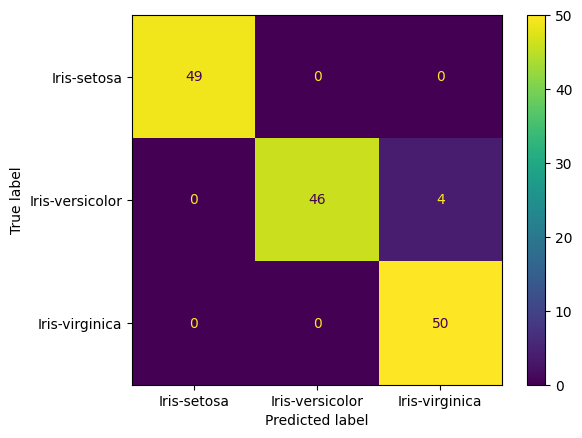

In [ ]:
# let's create confusion matrix for our best_svc_model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: we need to make all predictions
y_pred = best_svc_model.predict(all_inputs)

# Step2: Generate confusion matrix
cm = confusion_matrix(all_labels, y_pred) # so we compare all predictions with actual "ground truth"

# Step3: Show it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svc_model.classes_)
disp.plot()
plt.show()

## Step 6: Reproducibility

[[ go back to the top ]](#Table-of-contents)

Ensuring that our work is reproducible is the last and — arguably — most important step in any analysis. **As a rule, we shouldn't place much weight on a discovery that can't be reproduced**. As such, if our analysis isn't reproducible, we might as well not have done it.

Notebooks like this one go a long way toward making our work reproducible. Since we documented every step as we moved along, we have a written record of what we did and why we did it — both in text and code.

Beyond recording what we did, we should also document what software and hardware we used to perform our analysis. This typically goes at the top of our notebooks so our readers know what tools to use.

[Sebastian Raschka](http://sebastianraschka.com/) created a handy [notebook tool](https://github.com/rasbt/watermark) for this:

In [ ]:
!pip install watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.1 MB/s eta 0:00:00


In [ ]:
%load_ext watermark

In [ ]:
pd.show_versions() # pandas offers a built in info dump as well that can be useful


INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.12.12.final.0
python-bits           : 64
OS                    : Linux
OS-release            : 6.6.105+
Version               : #1 SMP Thu Oct  2 10:42:05 UTC 2025
machine               : x86_64
processor             : x86_64
byteorder             : little
LC_ALL                : en_US.UTF-8
LANG                  : en_US.UTF-8
LOCALE                : en_US.UTF-8

pandas                : 2.2.2
numpy                 : 2.0.2
pytz                  : 2025.2
dateutil              : 2.9.0.post0
setuptools            : 75.2.0
pip                   : 24.1.2
Cython                : 3.0.12
pytest                : 8.4.2
hypothesis            : None
sphinx                : 8.2.3
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : 5.4.0
html5lib              : 1.1
pymysql               : None
psycopg2             

In [ ]:
%watermark -a 'RTU_2025_Oct' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Author: RTU_2025_Oct

Python implementation: CPython
Python version       : 3.12.12
IPython version      : 7.34.0

numpy     : 2.0.2
pandas    : 2.2.2
sklearn   : 1.6.1
matplotlib: 3.10.0
seaborn   : 0.13.2

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.6.105+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



Finally, let's extract the core of our work from Steps 1-5 and turn it into a single pipeline.

[5.  3.4 1.6 0.4]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.8 2.7 4.1 1. ]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[4.9  3.1  1.5  0.25]	-->	Iris-setosa	(Actual: Iris-setosa)
[7.2 3.2 6.  1.8]	-->	Iris-virginica	(Actual: Iris-virginica)
[6.3 2.7 4.9 1.8]	-->	Iris-virginica	(Actual: Iris-virginica)
[5.1 3.5 1.4 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[6.9 3.1 5.1 2.3]	-->	Iris-virginica	(Actual: Iris-virginica)
[6.8 3.  5.5 2.1]	-->	Iris-virginica	(Actual: Iris-virginica)
[7.2 3.  5.8 1.6]	-->	Iris-virginica	(Actual: Iris-virginica)
[6.4 2.8 5.6 2.2]	-->	Iris-virginica	(Actual: Iris-virginica)


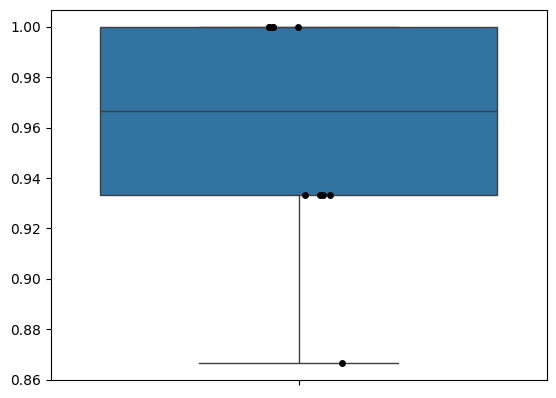

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns # sns is typical alias for seaborn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('data/iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_labels = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(criterion='gini', max_features=3, n_estimators=50)
# instead here I could have loaded already pretrained classificator using our pickled ones

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10)
sns.boxplot(rf_classifier_scores)
sns.stripplot(rf_classifier_scores, jitter=True, color='black')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

def processData(filename):
    # We can jump directly to working with the clean data because we saved our cleaned data set
    iris_data_clean = pd.read_csv(filename)

    # Testing our data: Our analysis will stop here if any of these assertions are wrong

    # We know that we should only have three classes
    assert len(iris_data_clean['class'].unique()) == 3

    # We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
    assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

    # We know that our data set should have no missing measurements
    assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                                   (iris_data_clean['sepal_width_cm'].isnull()) |
                                   (iris_data_clean['petal_length_cm'].isnull()) |
                                   (iris_data_clean['petal_width_cm'].isnull())]) == 0

    all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                                 'petal_length_cm', 'petal_width_cm']].values

    all_labels = iris_data_clean['class'].values

    # This is the classifier that came out of Grid Search
    random_forest_classifier = RandomForestClassifier(criterion='gini', max_features=3, n_estimators=50)

    # All that's left to do now is plot the cross-validation scores
    rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10)
    sns.boxplot(rf_classifier_scores)
    sns.stripplot(rf_classifier_scores, jitter=True, color='black')

    # ...and show some of the predictions from the classifier
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    random_forest_classifier.fit(training_inputs, training_classes)

    for input_features, prediction, actual in zip(testing_inputs[:10],
                                                  random_forest_classifier.predict(testing_inputs[:10]),
                                                  testing_classes[:10]):
        print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))
    return rf_classifier_scores

[6.4 2.9 4.3 1.3]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[5.1 3.4 1.5 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.  3.  1.6 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.8 2.7 3.9 1.2]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.8 3.  5.5 2.1]	-->	Iris-virginica	(Actual: Iris-virginica)
[6.4 3.2 5.3 2.3]	-->	Iris-virginica	(Actual: Iris-virginica)
[4.8 3.1 1.6 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[6.  3.4 4.5 1.6]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[5.8 2.7 4.1 1. ]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.7 3.3 5.7 2.1]	-->	Iris-virginica	(Actual: Iris-virginica)


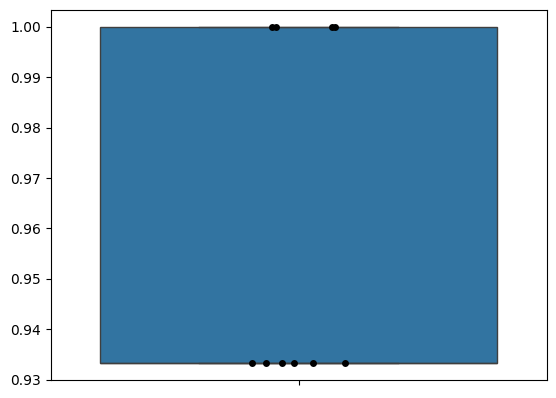

In [ ]:
myscores = processData('data/iris-data-clean.csv')

In [ ]:
myscores

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

There we have it: We have a complete and reproducible Machine Learning pipeline to demo to our company's Head of Data. We've met the success criteria that we set from the beginning (>90% accuracy), and our pipeline is flexible enough to handle new inputs or flowers when that data set is ready. Not bad for our first week on the job!

## 🔮 Clustering — General Ideas

There is another technique we can use on this particular data set - that actually does not require ANY answers.


Clustering is an **unsupervised learning** technique where the goal is to group data points into clusters based on their similarity. Unlike classification, clustering does **not use labels**; instead, the algorithm discovers natural groupings within the data.

### Key Concepts
- 📦 **Unsupervised learning** — The algorithm learns patterns without predefined categories.  
- 🎯 **Objective** — Maximize similarity within clusters while maximizing differences between clusters.  
- 🔑 **No ground truth** — Unlike classification, there is no "correct" answer to compare against.  

### Common Clustering Methods
- **k-Means** — Divides data into *k* clusters by minimizing the distance to cluster centroids.  
- **Hierarchical Clustering** — Builds a tree-like structure of nested clusters.  
- **DBSCAN** — Groups points based on density, useful for non-spherical clusters and noise handling.  

### Typical Workflow
1. **Preprocess data** — Scale/normalize features to avoid bias from differing scales.  
2. **Choose a clustering method** — Select algorithm based on data type and distribution.  
3. **Determine number of clusters** — Methods like the *elbow method* or *silhouette score* help.  
4. **Run clustering** — Assign data points to clusters.  
5. **Interpret results** — Visualize clusters, analyze centroids or structures.  

### Reflection
- Clustering is useful for **exploration** (finding hidden structure, customer segmentation, anomaly detection).  
- Since there are no labels, evaluation is less straightforward — metrics like **silhouette score** or **intra-/inter-cluster distances** are often used.  
- Clustering can provide insights but requires careful interpretation.  


In [ ]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Let's create a simple Kmeans example that utilizes our iris_data dataset
# the process is similar to using classifiers

# some important differences - we generally do not need train/test split
# we are just trying to make sense of groupings

# for irises we have a big advantage - we already have the answers - Ground Truth to check

# first let's import Kmeans from scikit-learn

# KMeans clustering (k=3) on Iris features with evaluation against ground truth (column 5)

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics.cluster import contingency_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np
# import pandas as pd

# 1) Split features/labels (first 4 columns = features; 5th column = ground truth species)
X = iris_data.iloc[:, :4].values
y_true_text = iris_data.iloc[:, 4].values

# Encode text labels to integers for evaluation
le = LabelEncoder()
y_true = le.fit_transform(y_true_text)  # e.g., setosa/versicolor/virginica -> 0/1/2

# 2) Scale features (important for distance-based algorithms like KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # so our original data is scaled
# using standard Scaled
# this means that X_scaled will have mean of 0
# and standard deviation of 1 for all columns
# needed to ensure fairness in importance for each parameter/column

# 3) Fit KMeans (k=3). Set random_state/n_init explicitly for reproducibility.
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
y_clusters = kmeans.fit_predict(X_scaled)# this is where actual clustering happens

# 4) Label-invariant metrics (do NOT require mapping of cluster IDs to class IDs)
ari = adjusted_rand_score(y_true, y_clusters)
nmi = normalized_mutual_info_score(y_true, y_clusters)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

# 5) Optional: Map cluster IDs to class IDs to compute standard accuracy/confusion matrix
#    We use the Hungarian algorithm on the contingency matrix to find the best mapping.
C = contingency_matrix(y_true, y_clusters)  # shape: [n_classes, n_clusters]
row_ind, col_ind = linear_sum_assignment(C.max() - C)  # maximize trace

# Build mapping: cluster_label -> class_label
cluster_to_class = {cluster: cls for cls, cluster in zip(row_ind, col_ind)}

# Apply mapping
y_pred_mapped = np.array([cluster_to_class[c] for c in y_clusters])

# 6) Report accuracy and confusion matrix with mapped predictions
acc = accuracy_score(y_true, y_pred_mapped)
cm = confusion_matrix(y_true, y_pred_mapped)
report = classification_report(y_true, y_pred_mapped, target_names=le.classes_)

print(f"\nMapped Accuracy: {acc:.3f}")
print("Confusion Matrix (rows=true, cols=predicted):")
print(pd.DataFrame(cm, index=le.classes_, columns=le.classes_))
print("\nClassification Report (after optimal mapping):")
print(report)


Adjusted Rand Index (ARI): 0.595
Normalized Mutual Information (NMI): 0.644

Mapped Accuracy: 0.819
Confusion Matrix (rows=true, cols=predicted):
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               49                0               0
Iris-versicolor            0               38              12
Iris-virginica             0               15              35

Classification Report (after optimal mapping):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        49
Iris-versicolor       0.72      0.76      0.74        50
 Iris-virginica       0.74      0.70      0.72        50

       accuracy                           0.82       149
      macro avg       0.82      0.82      0.82       149
   weighted avg       0.82      0.82      0.82       149



## Conclusions

[[ go back to the top ]](#Table-of-contents)

I hope you found this example notebook useful for your own work and learned at least one new trick by reading through it.


* [Submit an issue](https://github.com/ValRCS/LU-pysem/issues) on GitHub

* Fork the [notebook repository](https://github.com/ValRCS/LU-pysem), make the fix/addition yourself, then send over a pull request

## Further reading

[[ go back to the top ]](#Table-of-contents)

This notebook covers a broad variety of topics but skips over many of the specifics. If you're looking to dive deeper into a particular topic, here's some recommended reading.

**Data Science**: William Chen compiled a [list of free books](http://www.wzchen.com/data-science-books/) for newcomers to Data Science, ranging from the basics of R & Python to Machine Learning to interviews and advice from prominent data scientists.

**Machine Learning**: /r/MachineLearning has a useful [Wiki page](https://www.reddit.com/r/MachineLearning/wiki/index) containing links to online courses, books, data sets, etc. for Machine Learning. There's also a [curated list](https://github.com/josephmisiti/awesome-machine-learning) of Machine Learning frameworks, libraries, and software sorted by language.

**Unit testing**: Dive Into Python 3 has a [great walkthrough](http://www.diveintopython3.net/unit-testing.html) of unit testing in Python, how it works, and how it should be used

**pandas** has [several tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) covering its myriad features.

**scikit-learn** has a [bunch of tutorials](http://scikit-learn.org/stable/tutorial/index.html) for those looking to learn Machine Learning in Python. Andreas Mueller's [scikit-learn workshop materials](https://github.com/amueller/scipy_2015_sklearn_tutorial) are top-notch and freely available.

**matplotlib** has many [books, videos, and tutorials](http://matplotlib.org/resources/index.html) to teach plotting in Python.

**Seaborn** has a [basic tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html) covering most of the statistical plotting features.


## More Scikit-learn links

* https://scikit-learn.org/stable/index.html - starting page
* https://scikit-learn.org/stable/machine_learning_map.html - cheat sheet to choose estimator
* https://scikit-learn.org/stable/modules/clustering.html - clustering overview

## Acknowledgements

[[ go back to the top ]](#Table-of-contents)

Many thanks to [Andreas Mueller](http://amueller.github.io/) for some of his [examples](https://github.com/amueller/scipy_2015_sklearn_tutorial) in the Machine Learning section. I drew inspiration from several of his excellent examples.

The photo of a flower with annotations of the petal and sepal was taken by [Eric Guinther](https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg).

The photos of the various *Iris* flower types were taken by [Ken Walker](http://www.signa.org/index.pl?Display+Iris-setosa+2) and [Barry Glick](http://www.signa.org/index.pl?Display+Iris-virginica+3).

## Further questions?

Feel free to contact [Valdis Saulespurens]
(email:valdis.s.coding@gmail.com)